In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

In [4]:
import sys

### Starting Parameters - measured values from SM:

In [5]:
m_w = 80.379 #GeV; Mass of W boson
m_z = 91.1871 #GeV; Mass of Z boson

In [6]:
sin_w_sq_MS = 0.23125 #Z pole average measurement; MS value; Kumar et. al. (2013), Pg. 7, Eqn. 12

In [7]:
s_w_sq = sin_w_sq_MS
c_w_sq = 1 - s_w_sq

In [8]:
alpha_0 = 1/137.03599 #fine structure constant at low energies
alpha = 1/127.9 #fine structure constant at Z-pole i.e. mu = m_z; Czarnecki & Marciano (1996)

In [9]:
T3f = [0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5] #Weak isospin
Qf = np.array([2.0/3, -1.0/3, -1.0/3, 2.0/3, 2.0/3, -1.0/3, -1,-1, -1, 0, 0, 0]) #Charge

mf = [0.1, 0.1, 0.1, 1.275, 173.1, 4.18, 511*1e-6, 0.1057, 1.776, 0.00017, 0.0155, 2.2*1e-6] #Mass; GeV

#Masses of: up, down, strange, charm, top, bottom, electron, muon, tau, muon neutrino, tau neutrino, electron neutrino

#MASSES OF UP, DONW AND STRANGE QUARK HAVE BEEN CHANGED TO MATCH AD HOC QCD CORRECTIONS SUGGESTED IN Marciano & Sirlin (1982)

### Calculation of form factors in the $\overline{MS}$ scheme:

In [10]:
def kf(Q_sq):
    '''
    Fermionic loop contributions
    Czarnecki & Marciano (2000)
    '''
    adder = 0
    tester = 0
    for i in range(len(Qf)-1):
        '''
        #For left-handed fermions (red quarks only)
        '''
        zf = mf[i]**2/Q_sq
        pf = np.sqrt(1 + 4*zf)
        
        if i <= 5:
            adder += 3*(T3f[i]*Qf[i] - 2*(s_w_sq)*(Qf[i]**2))*(np.log((mf[i]/m_z)**2) - (5/3) + 4*zf + (1 - 2*zf)*pf*np.log((pf+1)/(pf-1))) 
            tester += (T3f[i]*Qf[i] - 2*(s_w_sq)*(Qf[i]**2))*np.log((mf[i]/m_z)**2)
        else:
            adder += (T3f[i]*Qf[i] - 2*(s_w_sq)*(Qf[i]**2))*(np.log((mf[i]/m_z)**2) - (5/3) + 4*zf + (1 - 2*zf)*pf*np.log((pf+1)/(pf-1)))
    
    print(tester)
    
    adder = adder/3

    return 1 - alpha*(adder)/(2*np.pi*s_w_sq)

In [11]:
def kb(Q_sq):
    '''
    Bosonic loop contributions
    Czarnecki & Marciano (2000)
    '''
    z = m_w**2/Q_sq
    p = np.sqrt(1 + 4*z)
    
    adder = -1*(42*c_w_sq + 1)*np.log((m_w/m_z)**2)/12 + (1/18) - ((p/2)*np.log((p+1)/(p-1)) - 1)*((7 - 4*z)*c_w_sq + (1+4*z)/6)
    adder += -1*z*((3/4) - z + (z - (3/2))*p*np.log((p+1)/(p-1)) + z*(2 - z)*(np.log((p+1)/(p-1)))**2)
    
    return 1 - alpha*adder/(2*np.pi*s_w_sq)

In [12]:
def integral(Q_sq, mi):
    fn = lambda x: x*(1-x)*np.log((mi**2 + Q_sq*x*(1-x))/m_z**2)
    dx = (1 - 0)/1000
    area = 0
    for i in range(1000):
        area += dx*(fn(0 + i*dx))
    return area

In [13]:
def k_low(Q_sq):
    '''
    This is from Ferroglia et. al. (2004)
    It works for q^2 << m_w^2 -> this is our regime since 10.94^2 (our energy scale) << 80.3^2
    '''
    adder = 0
    for i in range(len(Qf)):
        '''
        #Counting Fundamental Fermions and Bosons
        '''
        
        if i <= 5:
            adder += -6*(T3f[i]*Qf[i] - 2*(s_w_sq)*(Qf[i]**2))*integral(Q_sq, mf[i])
        else:
            adder += -2*(T3f[i]*Qf[i] - 2*(s_w_sq)*(Qf[i]**2))*integral(Q_sq, mf[i])
        
        #'''

    return 1 + alpha*(adder + (42*c_w_sq + 1)*np.log((m_w/m_z)**2)/12 - (23/18) + s_w_sq/3)/(2*np.pi*s_w_sq)

### Number Comparisons and scalings:

In [22]:
scale = kf(m_z*m_z) + kb(m_z*m_z) - 1 
#there is an extra 1 is because the end result considers fermion and boson loops TOGETHER and we counted 1 twice!

print(scale)
#scale needs to be 1; Kumar et. al. (2013) Pg. 11. This is close enough! 
#And tester needs to be -6.88; refer Kumar et.al. (2013) Pg. 35, Eqn. 34, or Czarnecki & Marciano (1996), 
#or Marciano & Sirlin (1982)

-6.522565659509188
1.0005345185839865


The Ferroglia et.al. (2004) approximation is especially useful for VERY low Q$^2$, were the kb(Q$^2$) and kf(Q$^2$) becomes unstable.

In [23]:
k_low(0) #should be 1.0279 Ferroglia et. al. (2004) Pg. 4, Eqn. 9

1.0279368656837733

In [24]:
k_low(0)*sin_w_sq_MS

0.2377104001893726

In [25]:
scale2 = k_low(m_z*m_z)
print(scale2)
#scale should be 1; Kumar et. al. (2013) Pg. 11. BUT... THIS APPROXIMATION IS SUPPOSED TO BREAK DOWN FOR Q^2 > m_w^2
#(See Ferroglia (2004)); So I expect this scaling to not be applicable to us.

0.9945752700012348


In [26]:
k_low(m_z*m_z)*sin_w_sq_MS

0.22999553118778557

In [27]:
k_low(m_z*m_z)*sin_w_sq_MS/scale2

0.23125

In [28]:
k_low(0) + 2*alpha/(9*np.pi*sin_w_sq_MS) 
#should be anywhere between 1.0301 (Czarnecki & Marciano (2000)) and 1.0323 (Kumar et. al. (2013)).

1.0303284479676713

In [29]:
(k_low(0) + 2*alpha/(9*np.pi*sin_w_sq_MS))*sin_w_sq_MS

0.23826345359252402

In [30]:
scale3 = k_low(m_z*m_z) + 2*alpha/(9*np.pi*sin_w_sq_MS)
print(scale3)
#scale should be 1; Kumar et. al. (2013) Pg. 11. BUT... THIS APPROXIMATION IS SUPPOSED TO BREAK DOWN FOR Q^2 > m_w^2
#(See Ferroglia (2004)); So I expect this scaling to not be applicable to us.

0.9969668522851327


In [31]:
(k_low(m_z*m_z) + 2*alpha/(9*np.pi*sin_w_sq_MS))*sin_w_sq_MS/scale3

0.23125

In [32]:
(k_low(0) + 2*alpha/(9*np.pi*sin_w_sq_MS))*sin_w_sq_MS/scale3

0.23898834053148701

(k_MS(0) + correction value)sin$^2(\theta_w)(m_{z}^{2})$ should be 0.23879 according to Kumar et. al. (2013) Pg. 39, Eqn. 40.
But in their graph in the back, the value seems to be at 0.2375 or so. And Davoudiasl (2015)'s graph shows value at around 0.2381.

If I have understood it correctly, I think that Figure 1 of Kumar et. al., is plotting Czarnecki & Marciano (2000) + Ferroglia et. al. (2004) expression directly (as I have done, 2 lines ago), without the MS correction. 

The value given in Kumar et. al. Pg. 39, includes the MS correction. It is likely different from my value, because my value of k_MS(0) + correction value isn't exactly 1.0323... they likely added the non-perturbative calculations more thoroughly, rather than using the ad hoc corrections suggested in Marciano & Sirlin (1982).

Sirlin's correction was, as far as I can tell, was directly employed by Ferroglia, Czarnecki & Marciano (2000) and Davoudiasl. Hence it seems overall consistent.

Also, it should be noted that different papers emphasise different regimes at different times. We have chosen the Z-pole value as our baseline... while some papers prefer to focus on Q$^{2} \rightarrow 0$ regime. So honestly, we only need concern ourselves with the precision of the value available at **our** Q$^{2}$ value.

Since the goal of this notebook is to mimic Figure 1 of Davoudiasl (2015)'s paper*, and we are not on in the Q$^{2} \rightarrow 0$ regime, I think Sirlin's correction works well enough for us.

*I have, however, cross-checked my work with Kumar et. al.'s paper, so I have plotted the fermionic and bosonic contributions as well.

### Plots:

In [33]:
q_array = np.logspace(-2, 4, 1e3) #GeV

In [34]:
sine_array = (kf(q_array*q_array) + kb(q_array*q_array) - 1)*sin_w_sq_MS

-6.522565659509188


In [35]:
sine2_array = (k_low(q_array*q_array))*sin_w_sq_MS 
#Refer Kumar et. al. (2013) Pg. 36, Eqn. 36 or their graph at the back; Thisis k(Q^2). This + 2*alpha/(9*np.pi) is also plotted.

<IPython.core.display.Javascript object>


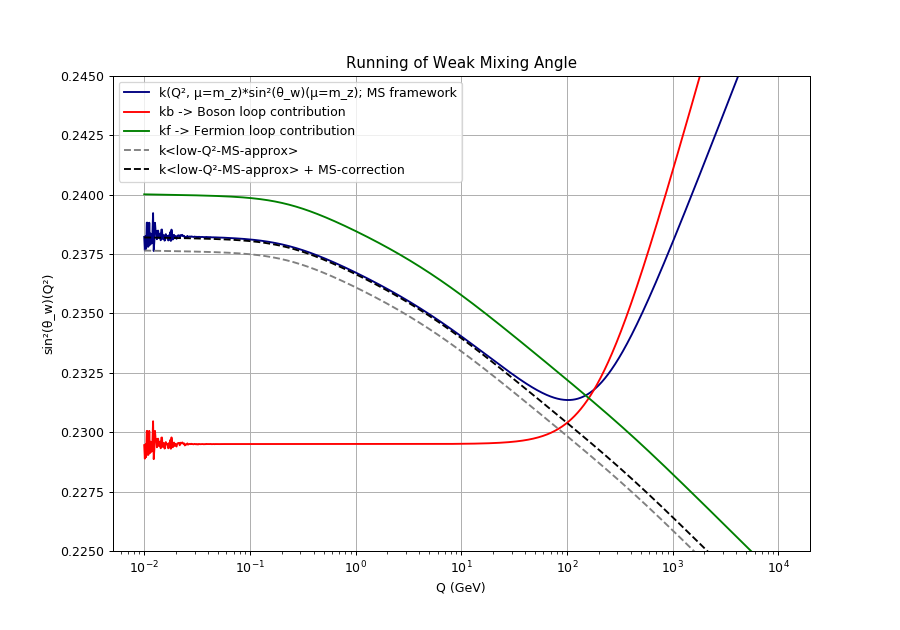

-6.522565659509188


In [36]:
plt.close()
plt.figure(figsize=(10, 7))
plt.semilogx(q_array, sine_array, color='navy', label="k(Q\u00B2, \u03BC=m_z)*sin\u00B2(\u03B8_w)(\u03BC=m_z); MS framework")
plt.semilogx(q_array, kb(q_array*q_array)*sin_w_sq_MS, 'r-', label='kb -> Boson loop contribution')
plt.semilogx(q_array, kf(q_array*q_array)*sin_w_sq_MS, 'g-', label='kf -> Fermion loop contribution')
plt.semilogx(q_array, sine2_array, '--',color='gray', label="k<low-Q\u00B2-MS-approx>")
plt.semilogx(q_array, sine2_array + 2*alpha/(9*np.pi), 'k--', label="k<low-Q\u00B2-MS-approx> + MS-correction")
plt.grid(True)
plt.ylim(0.225, 0.245)
plt.xlabel("Q (GeV)")
plt.ylabel("sin\u00B2(\u03B8_w)(Q\u00B2)")
plt.title("Running of Weak Mixing Angle")
plt.legend()

In [37]:
plt.close()

<IPython.core.display.Javascript object>


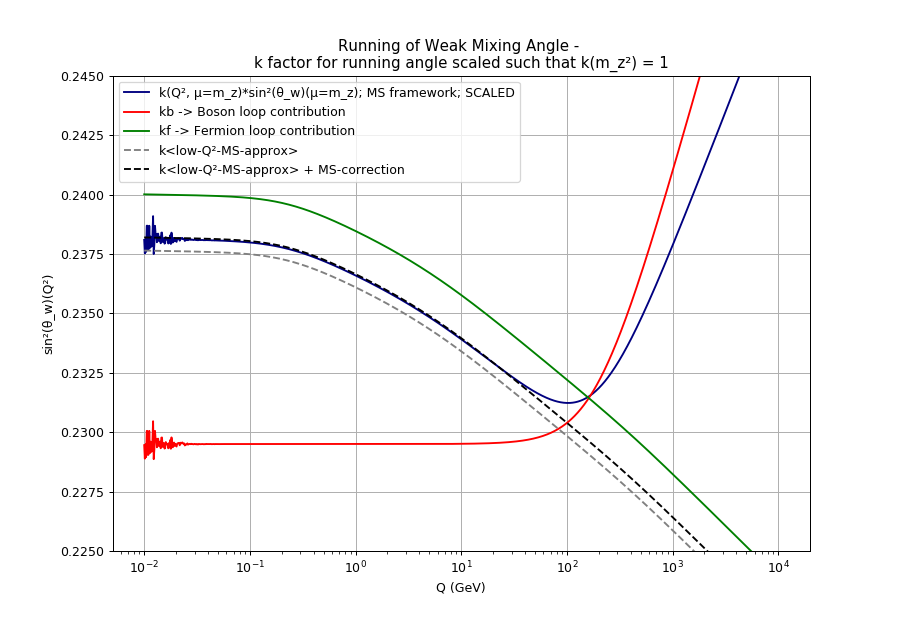

-6.522565659509188


In [38]:
plt.close()
plt.figure(figsize=(10, 7))
plt.semilogx(q_array, sine_array/scale, color='navy', label="k(Q\u00B2, \u03BC=m_z)*sin\u00B2(\u03B8_w)(\u03BC=m_z); MS framework; SCALED")
plt.semilogx(q_array, kb(q_array*q_array)*sin_w_sq_MS, 'r-', label='kb -> Boson loop contribution')
plt.semilogx(q_array, kf(q_array*q_array)*sin_w_sq_MS, 'g-', label='kf -> Fermion loop contribution')
plt.semilogx(q_array, sine2_array, '--',color='gray', label="k<low-Q\u00B2-MS-approx>")
plt.semilogx(q_array, sine2_array + 2*alpha/(9*np.pi), 'k--', label="k<low-Q\u00B2-MS-approx> + MS-correction")
plt.grid(True)
plt.ylim(0.225, 0.245)
plt.xlabel("Q (GeV)")
plt.ylabel("sin\u00B2(\u03B8_w)(Q\u00B2)")
plt.title("Running of Weak Mixing Angle - \nk factor for running angle scaled such that k(m_z\u00B2) = 1")
plt.legend()

In [39]:
plt.close()

In [41]:
q2_array = np.logspace(-4, 1.6, 1e3)

In [42]:
sine3_array = (k_low(q2_array*q2_array))*sin_w_sq_MS

<IPython.core.display.Javascript object>


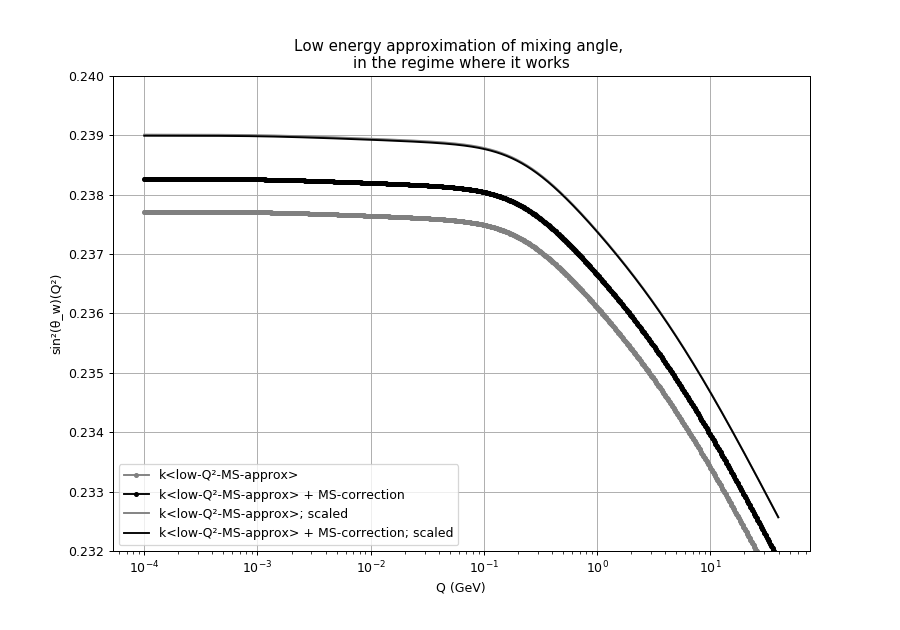

In [50]:
plt.close()
plt.figure(figsize=(10, 7))
plt.semilogx(q2_array, sine3_array, '.-', color='gray', label="k<low-Q\u00B2-MS-approx>")
plt.semilogx(q2_array, sine3_array + 2*alpha/(9*np.pi), 'k.-', label="k<low-Q\u00B2-MS-approx> + MS-correction")
plt.semilogx(q2_array, sine3_array/scale2,'-', color='gray', label="k<low-Q\u00B2-MS-approx>; scaled")
plt.semilogx(q2_array, (sine3_array + 2*alpha/(9*np.pi))/scale3, 'k-', label="k<low-Q\u00B2-MS-approx> + MS-correction; scaled")
#plt.semilogx(q2_array, sine3_array/scale,'--', color='gray', label="k<low-Q\u00B2-MS-approx>; scaled using first scale")
#plt.semilogx(q2_array, (sine3_array + 2*alpha/(9*np.pi))/scale, 'k--', label="k<low-Q\u00B2-MS-approx> + MS-correction; scaled using first scale")
plt.grid(True)
plt.ylim(0.232, 0.2400)
plt.xlabel("Q (GeV)")
plt.ylabel("sin\u00B2(\u03B8_w)(Q\u00B2)")
plt.title("Low energy approximation of mixing angle, \nin the regime where it works")
plt.legend()

In [51]:
plt.close()

### References:
1. Czarnecki & Marciano - Polarized Moller Scattering Asymmetries (2000) - arXiv.hep-ph.0003049v2
2. Czarnecki & Marciano - Electroweak Radiative Correction to Polarized Moller Scattering Asymmetries (1996) - arXiv.hep-ph.9507420v1
3. Ferroglia et. al. - The electroweak form factor k(q$^2$) and the running of sin$^2$($\theta_w$) (2004) - arXiv.hep-ph.0307200v2
4. Kumar et. al. - Low-Energy Measurements of the Weak Mixing Angle (2013) - arXiv1302.6263
5. Marciano & Sirlin - Radiative corrections to atomic parity violation (1982) - Phys.Rev.D.Vol.27.No.3
6. Davoudiasl et. al. - Low Q^2 Weak Mixing Angle Measurements and Rare Higgs Decays (2015) - arXiv1507.00352